# Importing necessary libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in datasets

In [6]:
data = pd.read_csv('../data/DataCoSupplyChainDataset.csv', encoding='latin1')

In [8]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Exploratory Data Analysis

### Summary of Data

In [15]:
data.shape

(180519, 53)

In [16]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [20]:
data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Dropping missing values

Since Order Zipcode has 155k missing values, I will drop it since there are other features that encode geographical information. Similarly, I will drop Product Description since it only has missing values.

In [33]:
data = data.drop(['Order Zipcode', 'Product Description'], axis = 1)

### Dropping ID columns

I will drop the columns that are IDs (Order ID, Customer ID, etc.)

In [50]:
id_columns = data.columns[data.columns.str.contains('Id')]

In [54]:
data = data.drop(id_columns, axis = 1)

### Bivariate Distributions with target

In [109]:
target = data['Late_delivery_risk']
target.value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [80]:
numeric_features = data.select_dtypes(include = np.number)

In [81]:
print(numeric_features.columns)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Customer Zipcode', 'Latitude', 'Longitude', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'Product Status'],
      dtype='object')


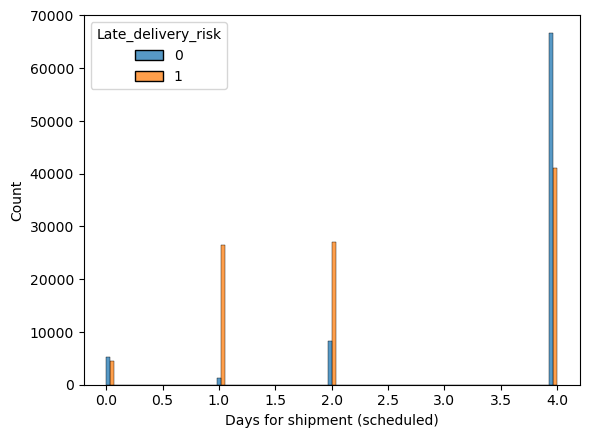

In [92]:
# Distribution of Days for shipping (real)
sns.histplot(data = data, x = 'Days for shipment (scheduled)', hue = 'Late_delivery_risk', multiple = 'dodge')
plt.show()

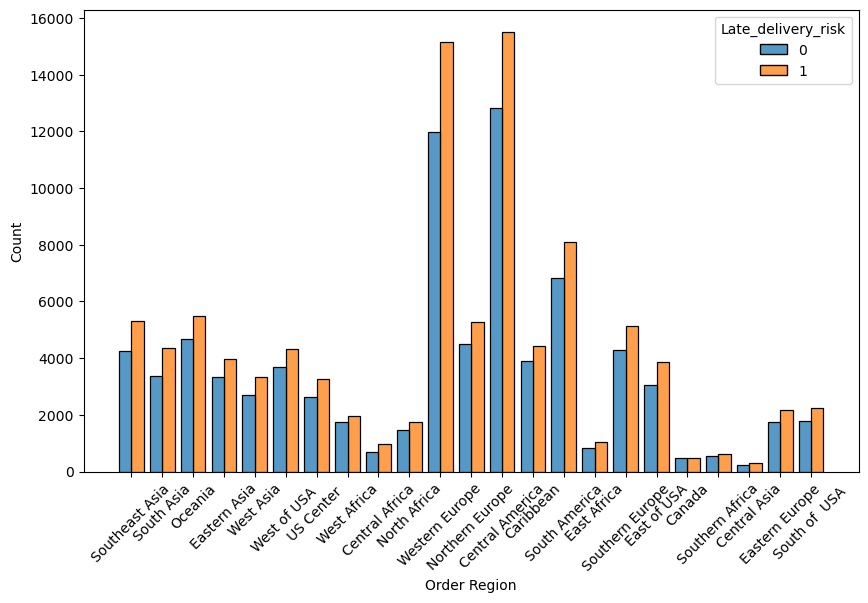

In [114]:
# Distribution of Order Region
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'Order Region', hue = 'Late_delivery_risk', multiple = 'dodge', shrink = 0.8)
plt.xticks(rotation = 45)
plt.show()

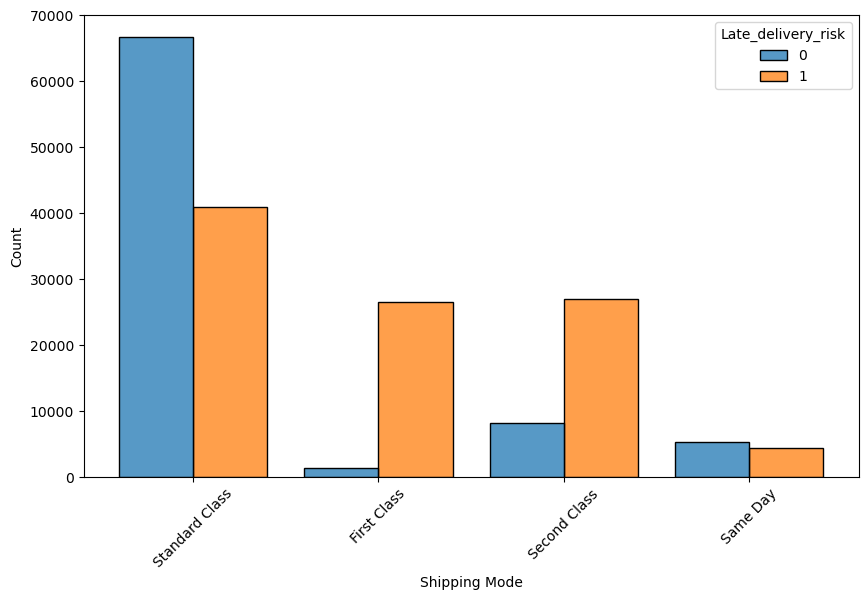

In [112]:
# Distribution of Shipping mode
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'Shipping Mode', hue = 'Late_delivery_risk', multiple = 'dodge', shrink = 0.8)
plt.xticks(rotation = 45)
plt.show()

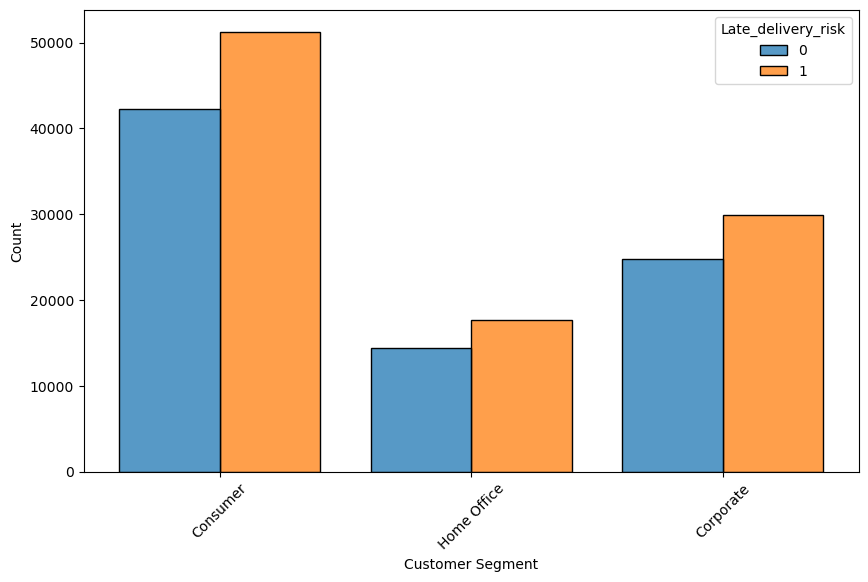

In [115]:
# Distribution for Customer Segment
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'Customer Segment', hue = 'Late_delivery_risk', multiple = 'dodge', shrink = 0.8)
plt.xticks(rotation = 45)
plt.show()

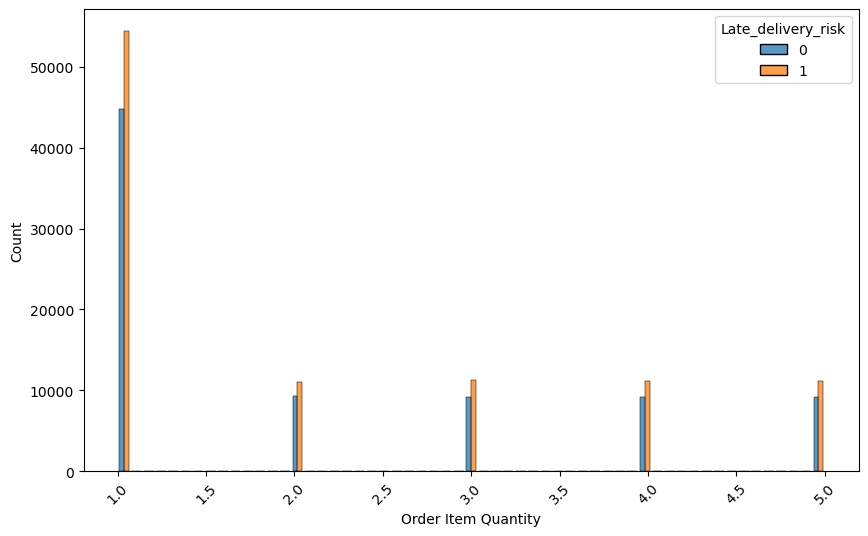

In [116]:
# Distribution for Order Item Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'Order Item Quantity', hue = 'Late_delivery_risk', multiple = 'dodge', shrink = 0.8)
plt.xticks(rotation = 45)
plt.show()

### Univariate Distributions (Categorical Features)

In [153]:
def plot_distribution(df, var):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var)

    # Check if column is categorical or object (strings)
    if df[var].dtype == "object" or isinstance(df[var].dtype, pd.CategoricalDtype):
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)

    plt.show()

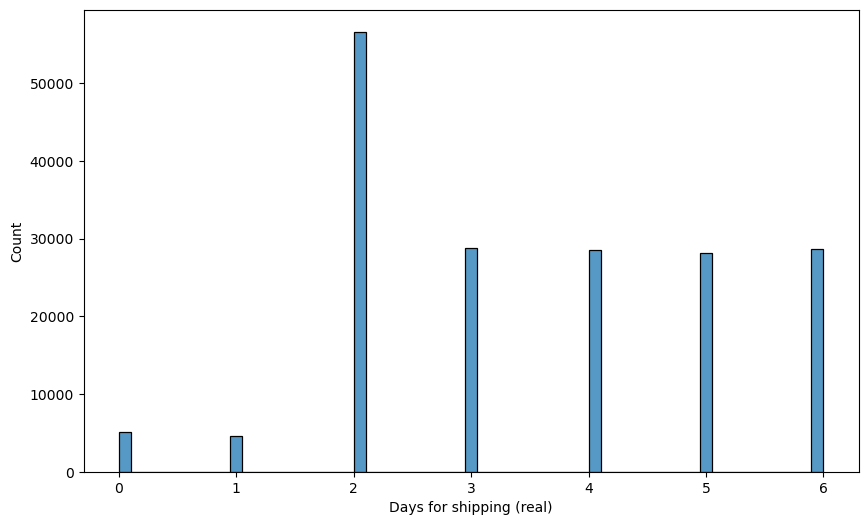

In [154]:
# Days for shipping (real)
plot_distribution(data, 'Days for shipping (real)')

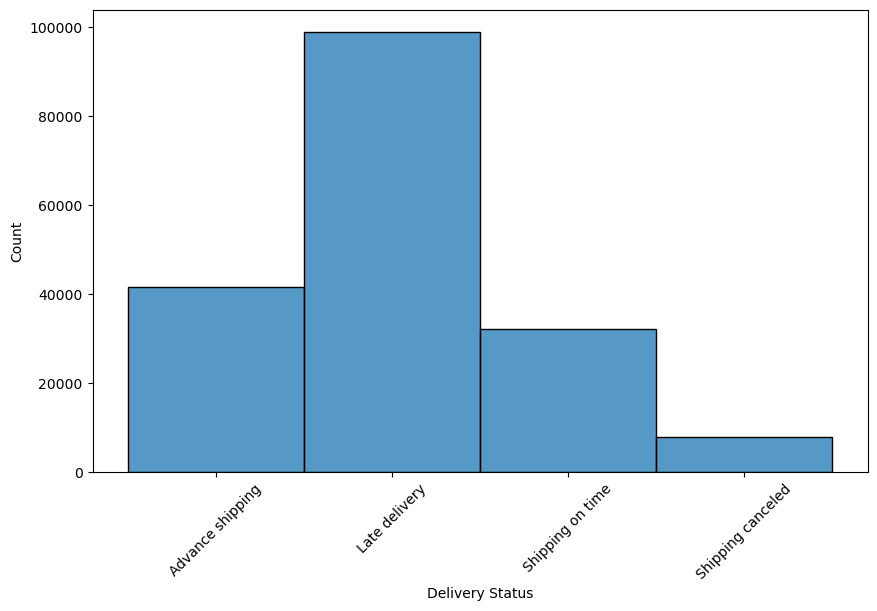

In [155]:
# Delivery Status
plot_distribution(data, 'Delivery Status')

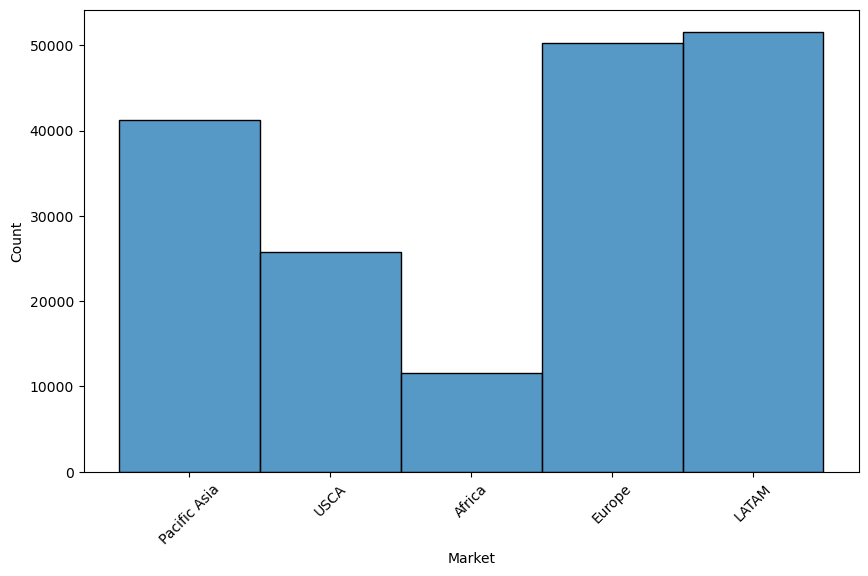

In [156]:
# Market
plot_distribution(data, 'Market')

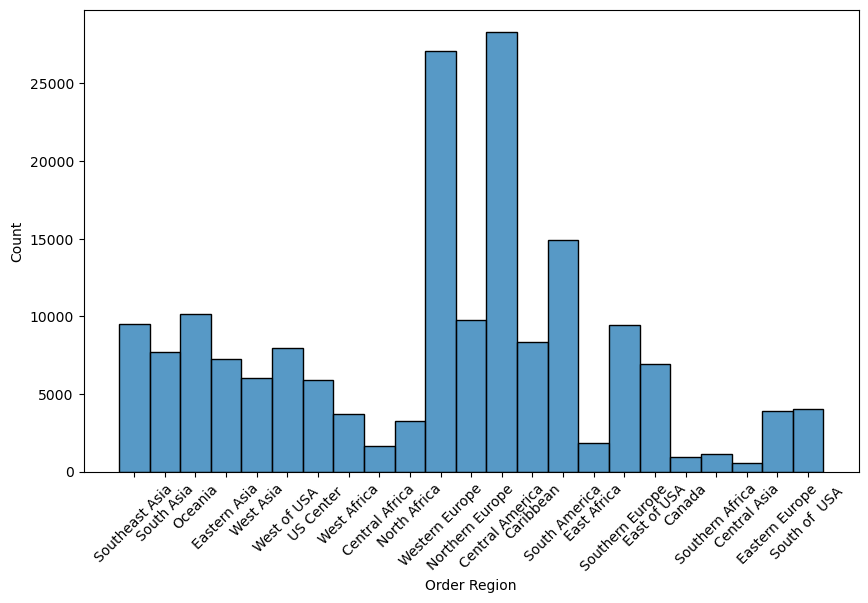

In [157]:
# Order Region
plot_distribution(data, 'Order Region')

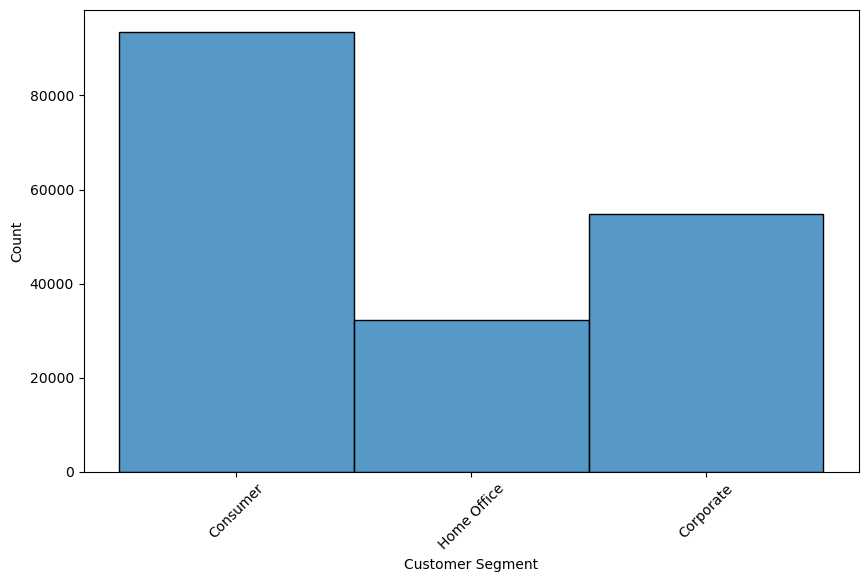

In [158]:
# Customer Segment
plot_distribution(data, 'Customer Segment')

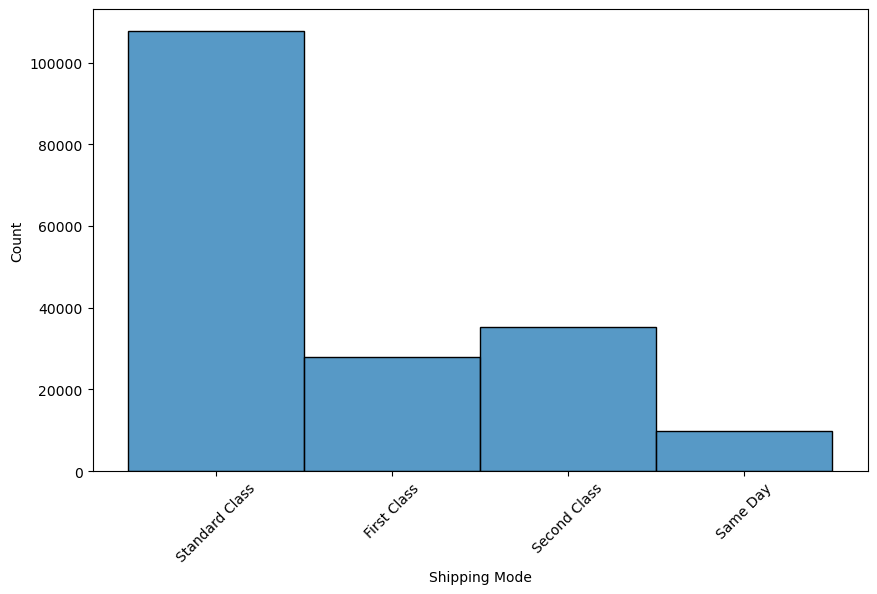

In [159]:
# Shipping Mode
plot_distribution(data, 'Shipping Mode')

### Univariate Distribution (Numeric)

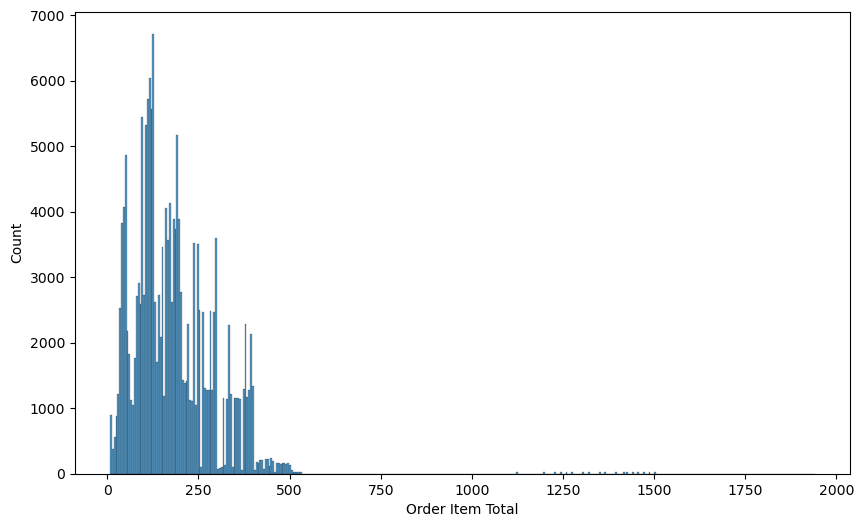

In [161]:
plot_distribution(data, 'Order Item Total')

### Correlation Heatmap

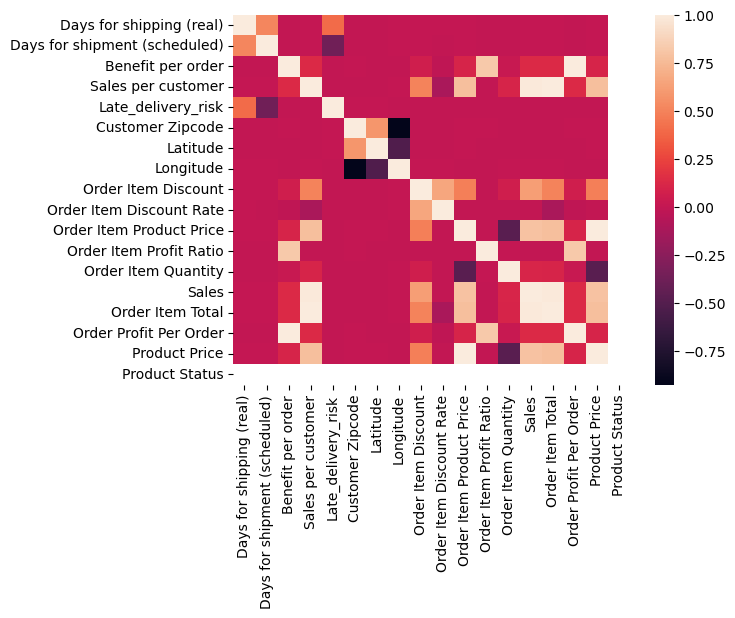

In [165]:
sns.heatmap(numeric_features.corr())
plt.show()

### Scatterplots for Interaction 

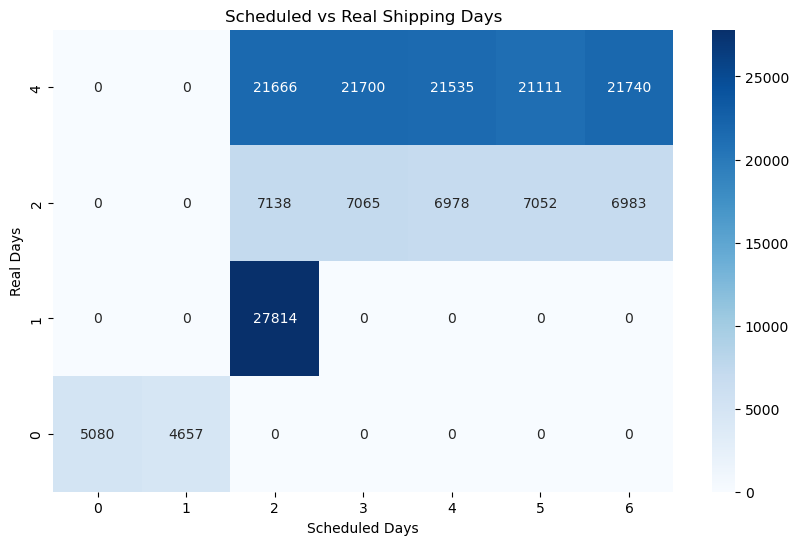

In [178]:
# Days for shipping (real) vs Days for shipping (scheduled)
cross = pd.crosstab(
    data["Days for shipment (scheduled)"], 
    data["Days for shipping (real)"]
)

plt.figure(figsize=(10,6))
sns.heatmap(cross.iloc[::-1], annot=True, fmt="d", cmap="Blues")
plt.xlabel("Scheduled Days")
plt.ylabel("Real Days")
plt.title("Scheduled vs Real Shipping Days")
plt.show()

# Data Processing + Feature Engineering

### Handling multicolinearity

Since days for shipping (real) and days for shipment (scheduled) are highly correlated, I will create a new feature called shipping gap that is calculated by taking scheduled - real.

In [180]:
shipping_gap = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

In [182]:
data['Shipping Gap'] = shipping_gap

This new variable will be for the second part of the model, where I predict how late a delivery will be.

In [187]:
list(data.columns)

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Image',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode',
 'Shipping Gap']

In [238]:
features_to_drop = [
    'Customer City',
    'Customer Country',
    'Customer Email',
    'Customer Fname',
    'Customer Lname',
    'Customer Password',
    'Customer Segment',
    'Customer State',
    'Customer Street',
    'Customer Zipcode',
    'Department Name',
    'shipping date (DateOrders)',
    'Product Status',
    'Product Name',
    'Product Image',
    'Sales',
    'Days for shipping (real)',
    'Delivery Status',
    'Order Status',
    'Order Item Total',
    'Order Profit Per Order',
    'Order Item Discount',
    'Order State',
    'Latitude',
    'Longitude',
    'Product Price',
    'Market',
    'Order Item Profit Ratio',
    'Benefit per order',
    'Sales per customer']
    
print(f"New Features: {list(data.drop(features_to_drop, axis = 1).columns)}")

New Features: ['Type', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Category Name', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Order Region', 'Shipping Mode', 'Shipping Gap']


### Encoding Order City to be Rural/Urban

In [253]:
import pandas as pd
import unidecode

# Function to normalize strings
def normalize(text):
    if pd.isna(text):
        return None
    return unidecode.unidecode(str(text)).strip().lower()

# Apply normalization
orders["Order City Clean"] = orders["Order City"].apply(normalize)
orders["Order Country Clean"] = orders["Order Country"].apply(normalize)
cities["city_clean"] = cities["city"].apply(normalize)
cities["country_clean"] = cities["country"].apply(normalize)

In [254]:
merged = orders.merge(
    cities[["city_clean", "country_clean", "population"]],
    left_on=["Order City Clean", "Order Country Clean"],
    right_on=["city_clean", "country_clean"],
    how="left"
)

In [255]:
def classify_urban_rural(pop):
    if pd.isna(pop):
        return "unknown"
    elif pop > 50000:
        return "urban"
    else:
        return "rural"

merged["city_type"] = merged["population"].apply(classify_urban_rural)

In [256]:
unmatched = merged[merged["city_type"] == "unknown"]["Order City Clean"].unique()
print(f"Cities still unmatched: {len(unmatched)}")

Cities still unmatched: 2585


In [259]:
from rapidfuzz import process

city_choices = cities["city_clean"].unique()

def fuzzy_match(city, choices, threshold=90):
    match, score, _ = process.extractOne(city, choices)
    return match if score >= threshold else None

# Apply fuzzy matching to unmatched cities
fuzzy_map = {city: fuzzy_match(city, city_choices) for city in unmatched}

# Map the fuzzy match population back
for city, matched_city in fuzzy_map.items():
    if matched_city:
        pop = cities.loc[cities["city_clean"] == matched_city, "population"].values[0]
        merged.loc[merged["Order City Clean"] == city, "population"] = pop
        merged.loc[merged["Order City Clean"] == city, "city_type"] = classify_urban_rural(pop)


In [262]:
# Instead of inplace, do:
merged["city_type"] = merged["city_type"].fillna("rural")

In [266]:
merged["city_type"] = merged["city_type"].replace("unknown", "rural")

In [268]:
merged["city_type"].value_counts()

city_type
urban    163253
rural     19184
Name: count, dtype: int64

In [278]:
list(merged.columns)

['Type',
 'Days for shipment (scheduled)',
 'Late_delivery_risk',
 'Category Name',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Quantity',
 'Order Region',
 'Shipping Mode',
 'Shipping Gap',
 'city_type']

### Feature Enginering on order time

In [289]:
import holidays

def create_time_features(df, date_col='order date (DateOrders)', country_col='Order Country'):
    """
    Create order_day_of_week, order_is_holiday, and order_month features.
    
    Parameters:
        df : pandas DataFrame
        date_col : str, name of order date column
        country_col : str, name of country column
    Returns:
        df : DataFrame with new features added
    """
    
    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Day of week
    df['order_day_of_week'] = df[date_col].dt.dayofweek
    
    # Month
    df['order_month'] = df[date_col].dt.month
    
    # Holiday indicator (binary)
    # Create a dictionary to cache country holidays
    country_holidays_cache = {}
    
    def is_holiday(row):
        country = row[country_col]
        date = row[date_col].date()
        if country not in country_holidays_cache:
            try:
                country_holidays_cache[country] = holidays.CountryHoliday(country)
            except:
                country_holidays_cache[country] = set()  # fallback: empty set
        return int(date in country_holidays_cache[country])
    
    df['order_is_holiday'] = df.apply(is_holiday, axis=1)
    df = df.drop(['order date (DateOrders)'], axis = 1)
    
    return df

In [290]:
data = create_time_features(merged)

In [291]:
list(data.columns)

['Type',
 'Days for shipment (scheduled)',
 'Late_delivery_risk',
 'Category Name',
 'Order Country',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Quantity',
 'Order Region',
 'Shipping Mode',
 'Shipping Gap',
 'city_type',
 'order_day_of_week',
 'order_month',
 'order_is_holiday']

The Feature Engineering I conducted is engineered the Order City feature to be whether the city is urban or rural as well as engineered the time feature to include details such as day, month, and whether the order was placed on a holiday.